In [1]:
import pandas as pd

In [28]:
data=pd.read_excel("Social Network Dataset.xlsx",sheet_name=["Elements","Connections"])

In [54]:
elements_data=data["Elements"]

In [30]:
connections_data=data["Connections"]

In [31]:
connections_data.head()

From        To    Type  Weight    When
0  S-c1b610  S-7d9053   Other     1.0  2012.0
1  S-4985b3  S-e7dad4  School     1.0  2015.0
2  S-376418  S-ab3070  School     1.0  2012.0
3  S-d00f38  S-6e1f64  School     1.0  2016.0
4  S-e538e3  S-596786   Other     1.0  1994.0

In [32]:
elements_data.head()

Label     Type  School (ID) Answered the form
0  S-c1b610  Student           27               Yes
1  S-4985b3  Student           25               Yes
2  S-376418  Student           67               Yes
3  S-d00f38  Student           24               Yes
4  S-e538e3  Student           30               Yes

In [33]:
connections_data.head()

From        To    Type  Weight    When
0  S-c1b610  S-7d9053   Other     1.0  2012.0
1  S-4985b3  S-e7dad4  School     1.0  2015.0
2  S-376418  S-ab3070  School     1.0  2012.0
3  S-d00f38  S-6e1f64  School     1.0  2016.0
4  S-e538e3  S-596786   Other     1.0  1994.0

In [34]:
import networkx as nx

In [36]:
edge_col=["Type","Weight","When"]
graph=nx.convert_matrix.from_pandas_edgelist(connections_data,source="From",target="To",edge_attr=edge_col)

In [37]:
from random import sample
sampled_edges=sample(graph.edges,10)

In [39]:
graph.edges(sampled_edges[0])

EdgeDataView([('S-3a55a8', 'S-a7be7c'), ('S-3a55a8', 'S-9a28c1'), ('S-3a55a8', 'S-6d4861'), ('S-3a55a8', 'S-aef13c'), ('S-3a55a8', 'S-b0a022'), ('S-3a55a8', 'S-cae80a'), ('S-3a55a8', 'S-6dd3b7'), ('S-6d4861', 'S-4ea0d4'), ('S-6d4861', 'S-9afa50'), ('S-6d4861', 'S-82d78a'), ('S-6d4861', 'S-a06547'), ('S-6d4861', 'S-c4d6ce')])

In [40]:
elements_data.head()

Label     Type  School (ID) Answered the form
0  S-c1b610  Student           27               Yes
1  S-4985b3  Student           25               Yes
2  S-376418  Student           67               Yes
3  S-d00f38  Student           24               Yes
4  S-e538e3  Student           30               Yes

In [42]:
node_dict=elements_data.set_index('Label').to_dict(orient="index")
nx.set_node_attributes(graph,node_dict)
sampled_nodes=sample(graph.nodes,10)
graph.nodes[sampled_nodes[0]]

{'Type': 'Student', 'School (ID)': 15, 'Answered the form': 'Yes'}

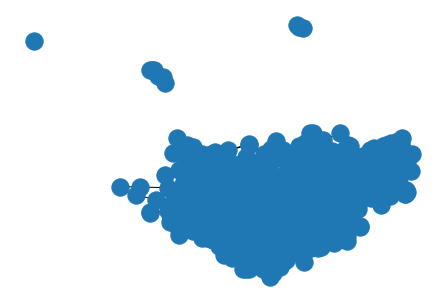

In [43]:
nx.draw(graph)

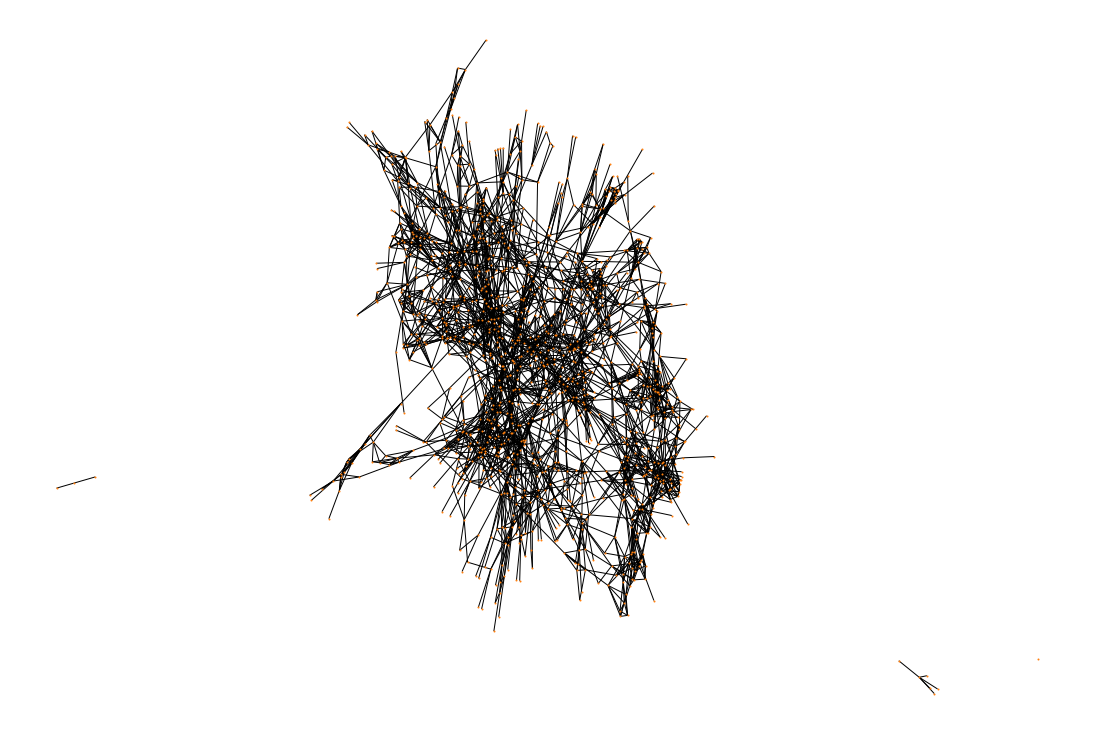

In [45]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,10))
nx.draw(graph,node_size=1,node_color="C1")

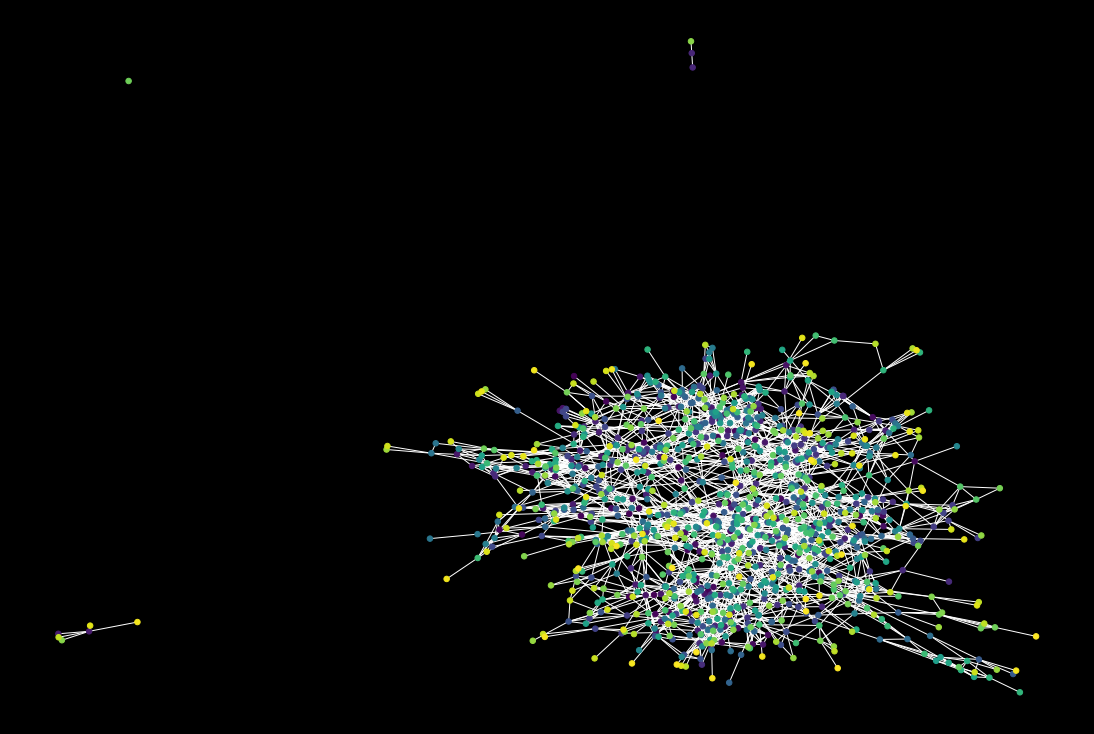

In [48]:
import numpy as np
fig=plt.figure(figsize=(15,10))
colors=np.linspace(0,1,len(graph.nodes))
nx.draw(graph,node_size=30,node_color=colors,edge_color="white")
fig.set_facecolor("black")

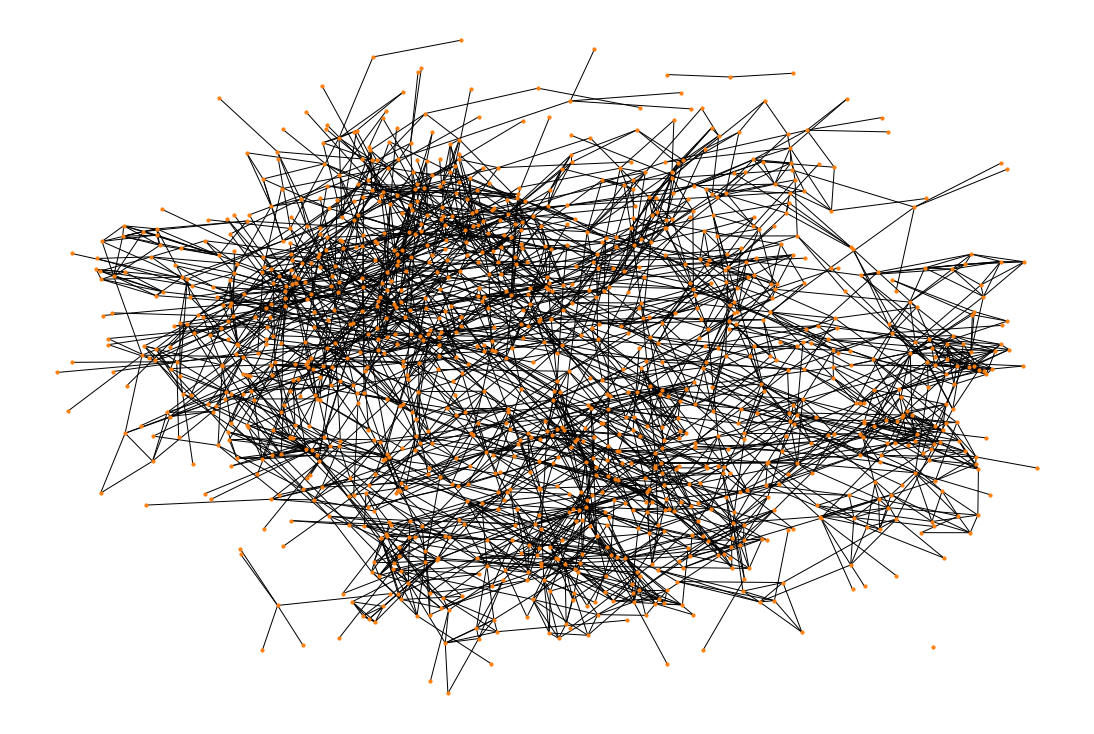

In [49]:
plt.figure(figsize=(15,10))
k=0.1
layout=nx.spring_layout(graph,k=k)
nx.draw(graph,node_size=10,node_color="C1",pos=layout)

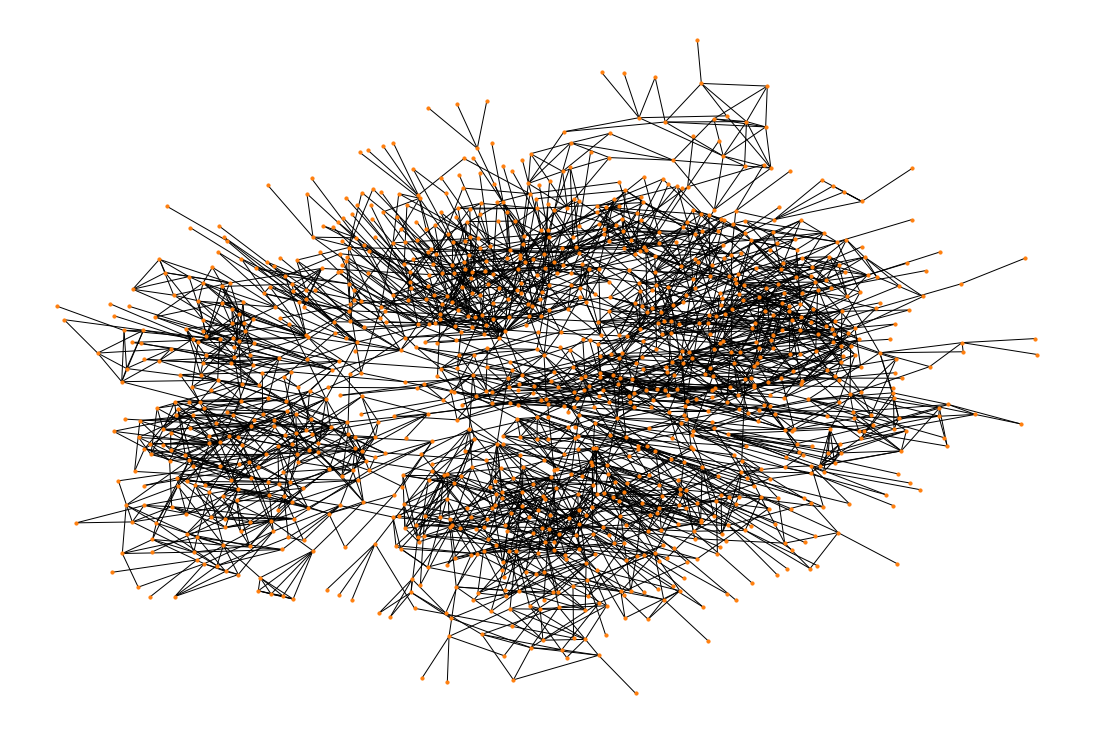

In [51]:
plt.figure(figsize=(15,10))
k=0.9
layout=nx.kamada_kawai_layout(graph)
nx.draw(graph,node_size=10,node_color="C1",pos=layout)

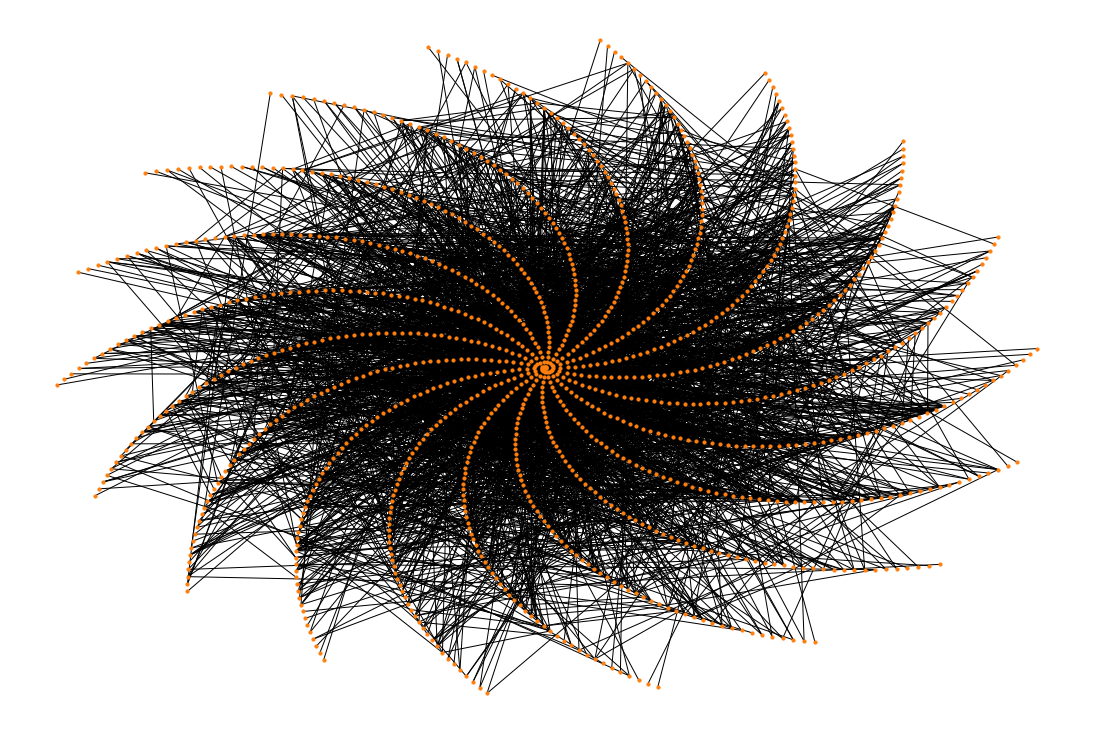

In [52]:
plt.figure(figsize=(15,10))
layout=nx.spiral_layout(graph)
nx.draw(graph,node_size=10,node_color="C1",pos=layout)

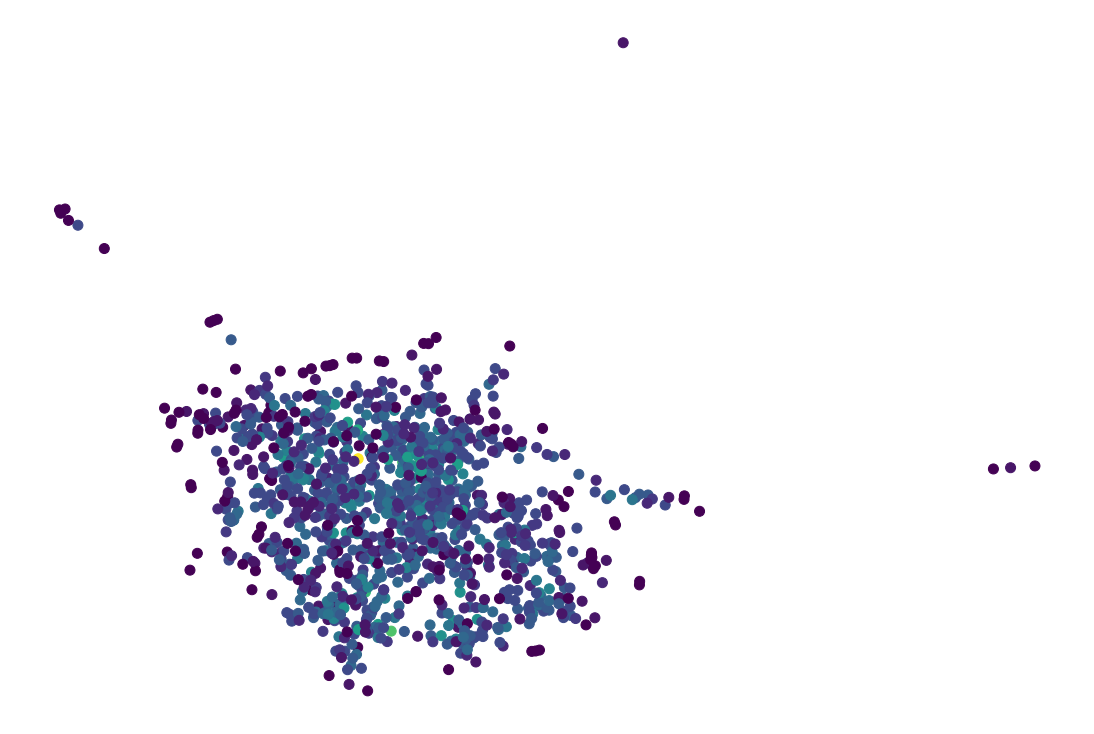

In [55]:
plt.figure(figsize=(15,10))
centrality=nx.degree_centrality(graph)
colors=list(centrality.values())
nx.draw(graph,node_size=100,node_color=colors,edge_color="white")
fig.set_facecolor("red")

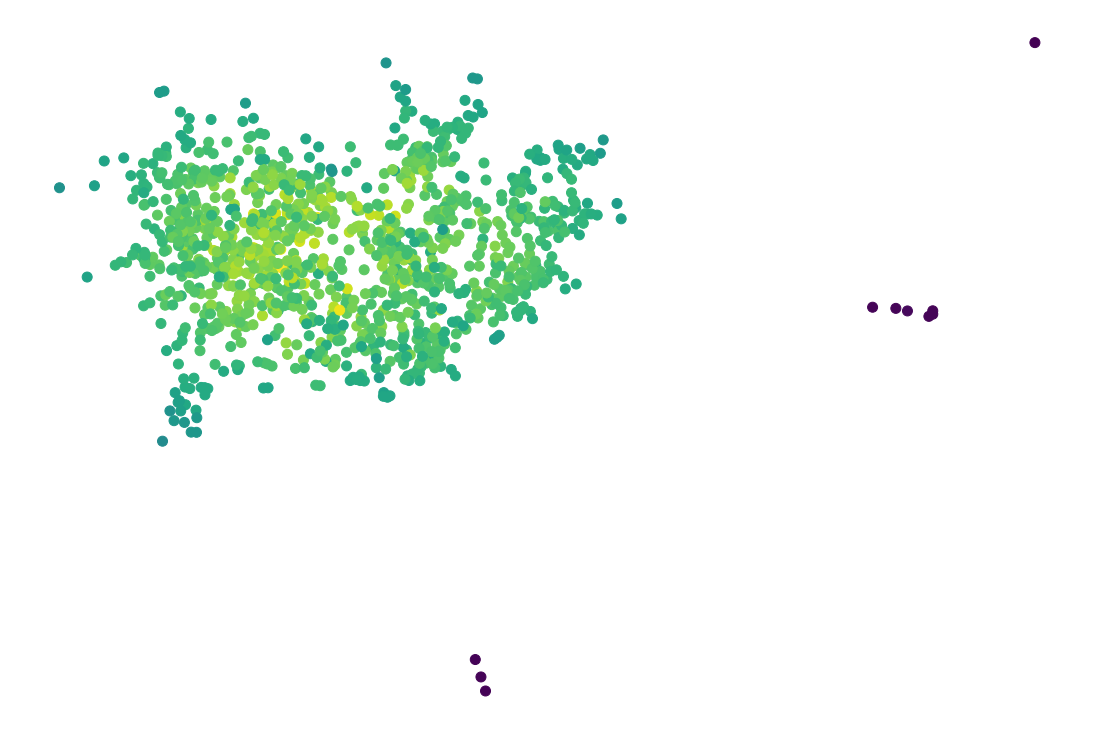

In [56]:
plt.figure(figsize=(15,10))
centrality=nx.closeness_centrality(graph)
colors=list(centrality.values())
nx.draw(graph,node_size=100,node_color=colors,edge_color="white")
fig.set_facecolor("red")

In [60]:
sample(centrality.items(),30)

[('S-623ada', 0.15005554892042627),
 ('S-ad3a1d', 0.17266999007328368),
 ('S-cd07c0', 0.16018640052172334),
 ('S-eea842', 0.12909834702251896),
 ('S-aa39c4', 0.16102265319651735),
 ('S-3a55a8', 0.15147116730646804),
 ('S-739291', 0.15113912219438422),
 ('S-bed4e1', 0.14121492682137948),
 ('S-b00088', 0.1489874021377208),
 ('S-70490d', 0.15005554892042627),
 ('S-694fee', 0.13370795033281424),
 ('S-5a3f74', 0.14616334862419872),
 ('S-c7882a', 0.16133295149586369),
 ('S-7ed8fe', 0.1553046101255399),
 ('S-398cb7', 0.16415740792961478),
 ('S-8fe4bb', 0.16765611394899865),
 ('S-f88274', 0.13657467870163711),
 ('S-1de466', 0.15703160404842573),
 ('S-3aa76b', 0.15333384257161822),
 ('S-5dace5', 0.14328653943978603),
 ('S-6181a1', 0.1413170837493911),
 ('S-d57917', 0.17753467019349434),
 ('S-102916', 0.14369055934993866),
 ('S-c8cb69', 0.167344930413685),
 ('S-bc867c', 0.14748759187334212),
 ('S-7b1a2f', 0.1764655062658009),
 ('S-5463e3', 0.15974974684713775),
 ('S-5f72bc', 0.14114690421693757)

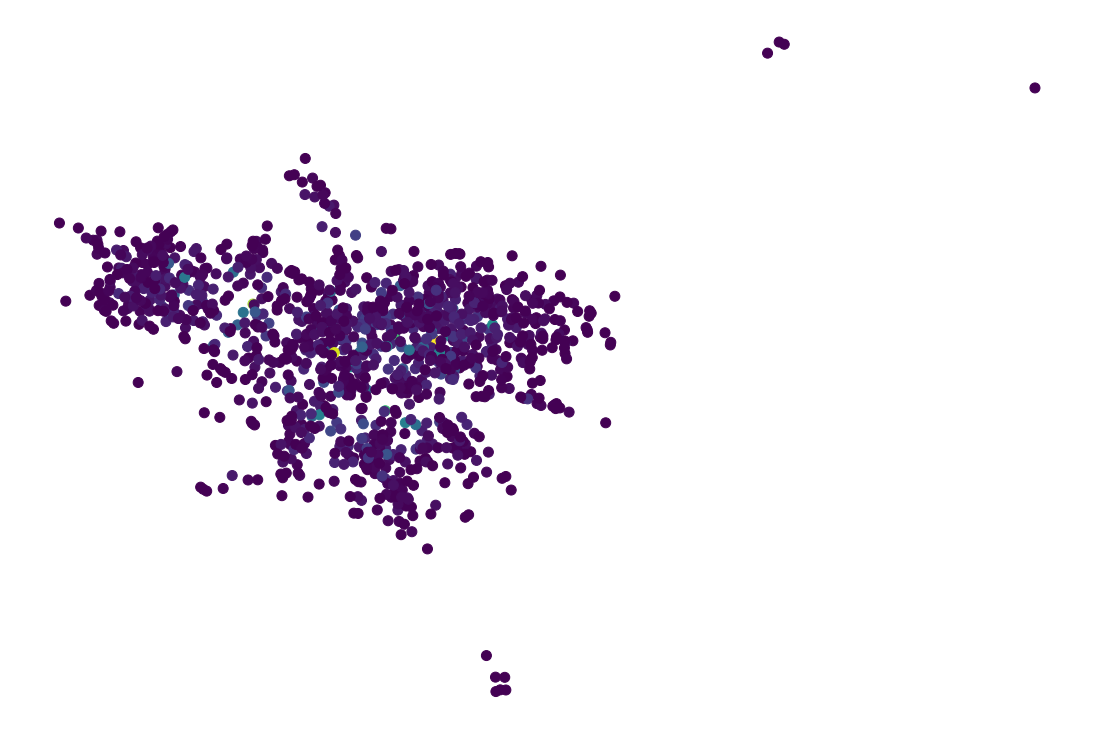

In [61]:
plt.figure(figsize=(15,10))
centrality=nx.betweenness_centrality(graph)
colors=list(centrality.values())
nx.draw(graph,node_size=100,node_color=colors,edge_color="white")
fig.set_facecolor("red")

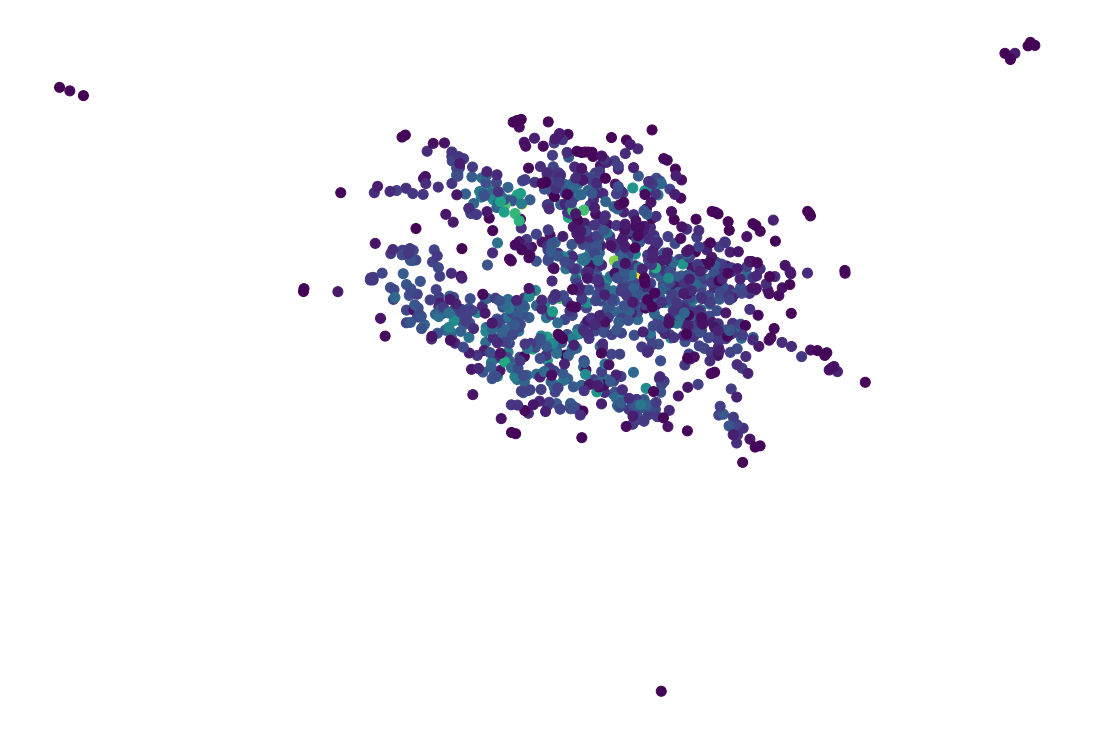

In [62]:
plt.figure(figsize=(15,10))
centrality=nx.katz_centrality(graph)
colors=list(centrality.values())
nx.draw(graph,node_size=100,node_color=colors,edge_color="white")
fig.set_facecolor("red")

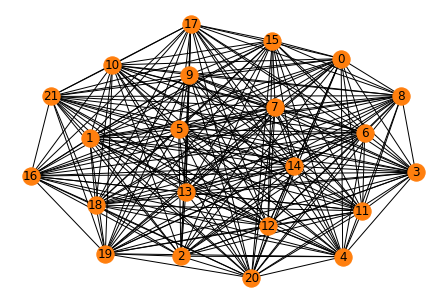

In [65]:
g1=nx.complete_graph(22)
nx.draw(g1,node_color="C1",with_labels=True)

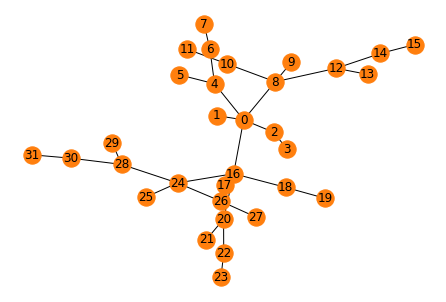

In [69]:
g2=nx.binomial_tree(5)
nx.draw(g2,node_color="C1",with_labels=True)

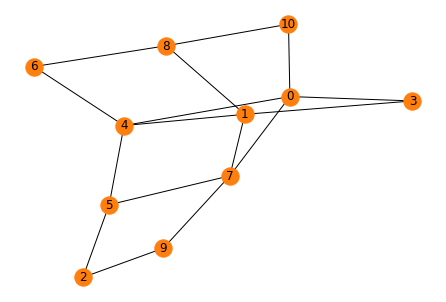

In [81]:
g3=nx.binomial_graph(11,0.2)
nx.draw(g3,node_color="C1",with_labels=True)

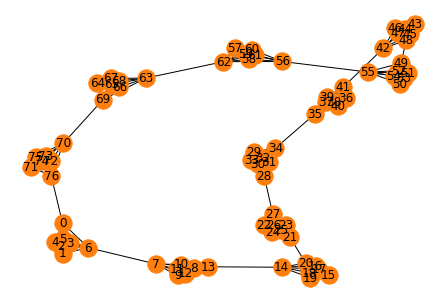

In [82]:
g4=nx.connected_caveman_graph(11,7)
nx.draw(g4,node_color="C1",with_labels=True)

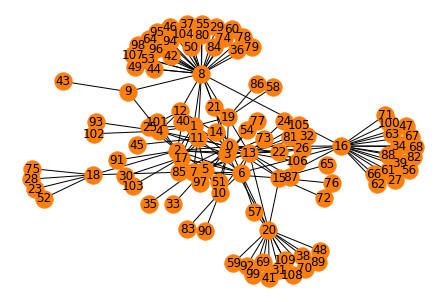

In [84]:
g4=nx.random_internet_as_graph(110)
nx.draw(g4,node_color="C1",with_labels=True)

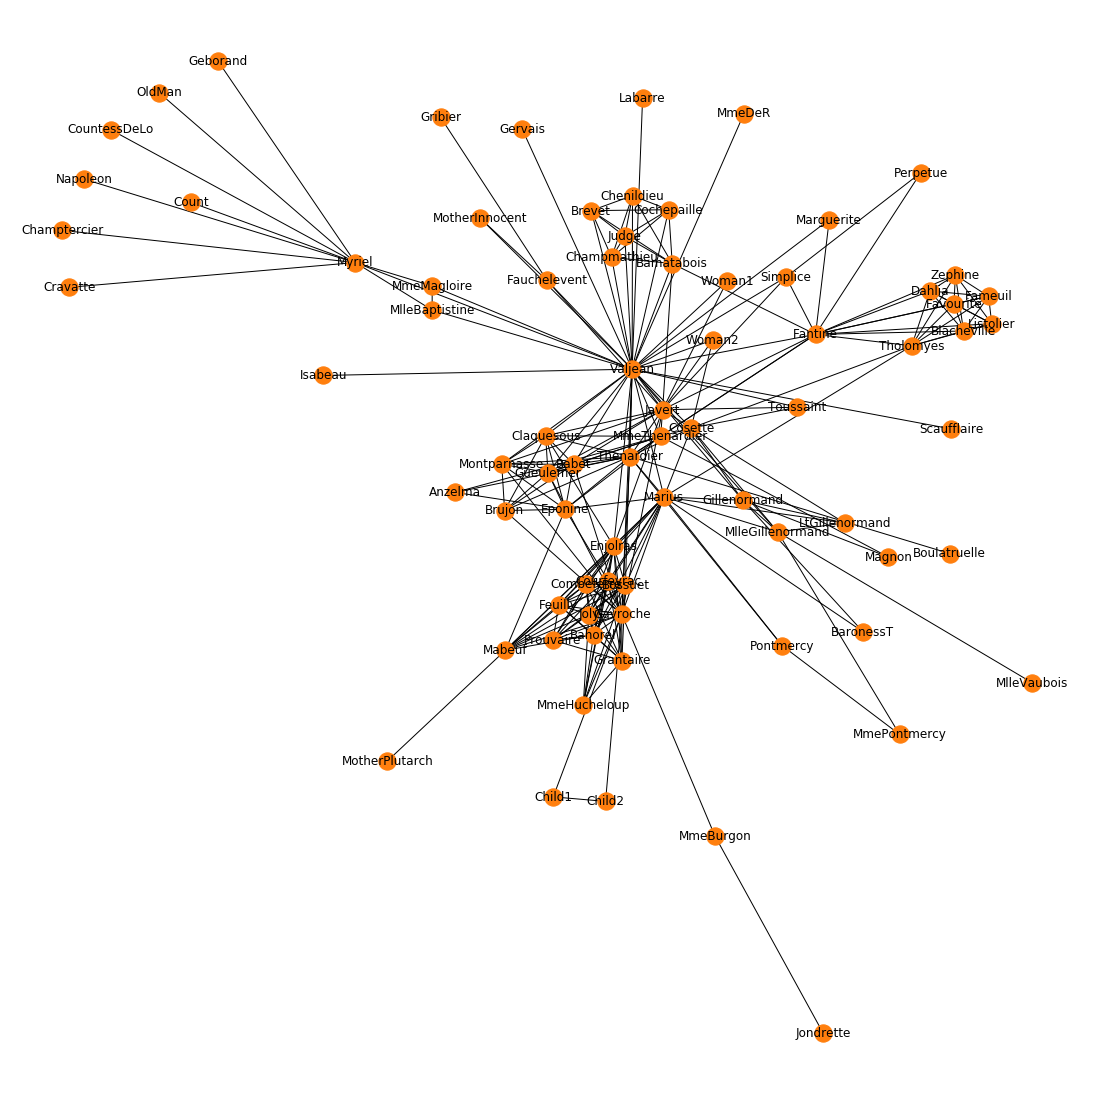

In [87]:
plt.figure(figsize=(15,15))
g4=nx.les_miserables_graph()
nx.draw(g4,node_color="C1",with_labels=True)

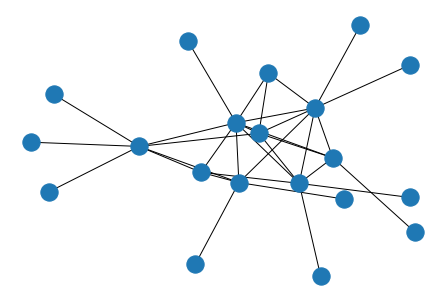

In [88]:
g11=nx.random_internet_as_graph(20)
nx.draw(g11)

In [89]:
g11.add_edge(10,11)

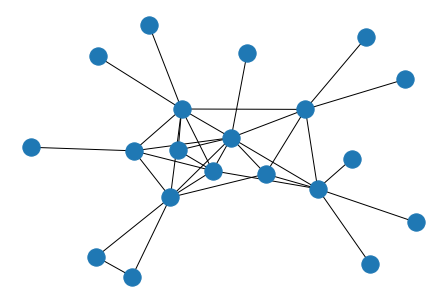

In [90]:
nx.draw(g11)

In [91]:
g11.add_node(40)

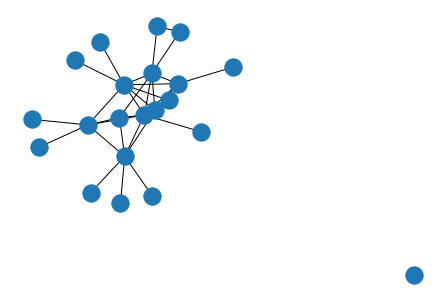

In [92]:
nx.draw(g11)

In [93]:
g11.add_node("new_node")

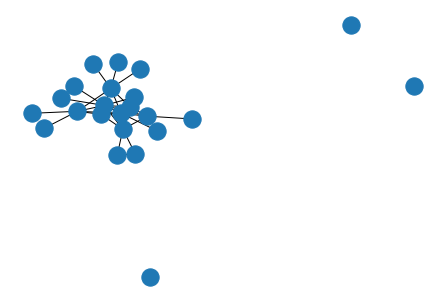

In [94]:
g11.add_node(lambda x: x)
nx.draw(g11)

In [95]:
g11.add_edge("a","b")

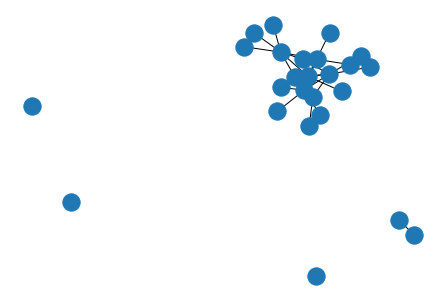

In [96]:
nx.draw(g11)

In [97]:
nodes=["h","r","s"]
edges=[("h","r"),("r","s")]
g11.add_nodes_from(nodes)
g11.add_edges_from(edges)

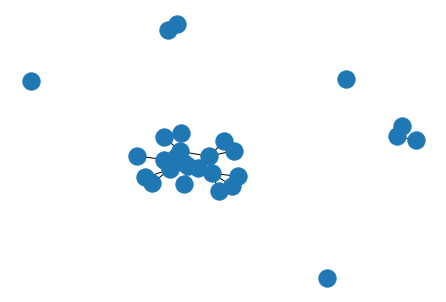

In [98]:
nx.draw(g11)

In [99]:
g13=nx.Graph()

In [100]:
edges=[(1,2),(2,3),(3,4)]

In [101]:
g13.add_edges_from(edges)

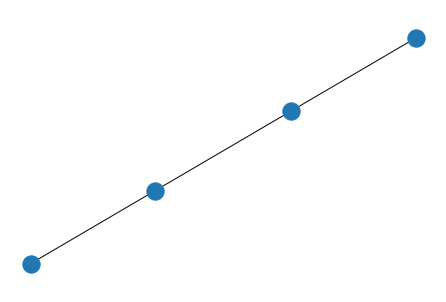

In [102]:
nx.draw(g13)

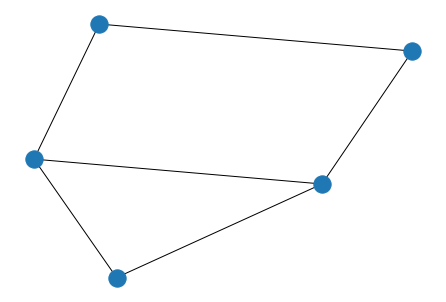

In [104]:
gg=nx.Graph()
edges=[(1,2),(2,3),(4,5),(1,5),(2,4),(3,4)]
gg.add_edges_from(edges)
nx.draw(gg)

In [105]:
gg.nodes(1)

NodeDataView({1: None, 2: None, 3: None, 4: None, 5: None}, data=1)

In [106]:
gg.nodes[1]["category"]="A"

In [107]:
gg.nodes(1)

NodeDataView({1: None, 2: None, 3: None, 4: None, 5: None}, data=1)

In [109]:
gg.edges(1,2)

EdgeDataView([(1, 2, None), (1, 5, None)])

In [112]:
gg.edges[1,2]["weight"]=2

In [113]:
gg.edges(1,2)

EdgeDataView([(1, 2, None), (1, 5, None)])

In [144]:
edge_weights={edge: np.random.rand() for edge in gg.edges}
nx.set_edge_attributes(gg,edge_weights,"weight")

In [121]:
gg.edges(3,4)

EdgeDataView([(3, 2, None), (3, 4, None)])

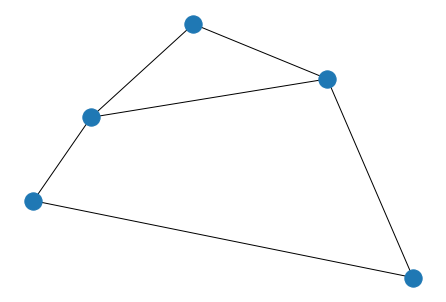

In [127]:
nx.draw(gg,weight=True)

In [145]:
node_sizes={node: np.random.rand() for node in gg.nodes}
nx.set_node_attributes(gg,node_sizes,"size")

In [149]:
node_colors={node: np.random.rand()*10 for node in gg.nodes}
nx.set_node_attributes(gg,node_colors,"color")

In [150]:
width=list(nx.get_edge_attributes(gg,"weight").values())
node_sizes=list(nx.get_node_attributes(gg,"size").values())
node_colors=list(nx.get_node_attributes(gg,"color").values())

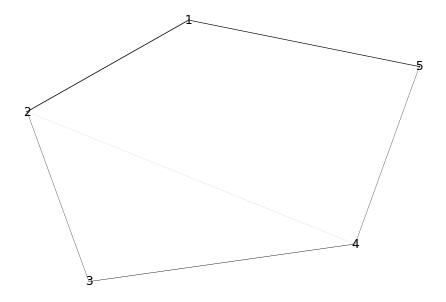

In [151]:
nx.draw(gg,with_labels=True,node_size=node_sizes,node_color=node_colors,width=width)

In [152]:
nx.get_node_attributes(gg,"size")

{1: 0.8029182906214486,
 2: 0.42401664763116975,
 3: 0.21258852904971237,
 4: 0.04569725260181767,
 5: 0.6080608500202875}